<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 4</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago<p>
</div>

INICIO / PREPARACION DE BASE

Datos de sobre entradas totales de visitantes a un Parque Nacional con cualquier finalidad principal -ocio, negocios u otro motivo personal- que no sea ser empleado por el Parque.

Fuente = https://datos.yvera.gob.ar/series/api/series/?ids=pn_visitantes_total

Algunos Métodos Simples de Forecasting

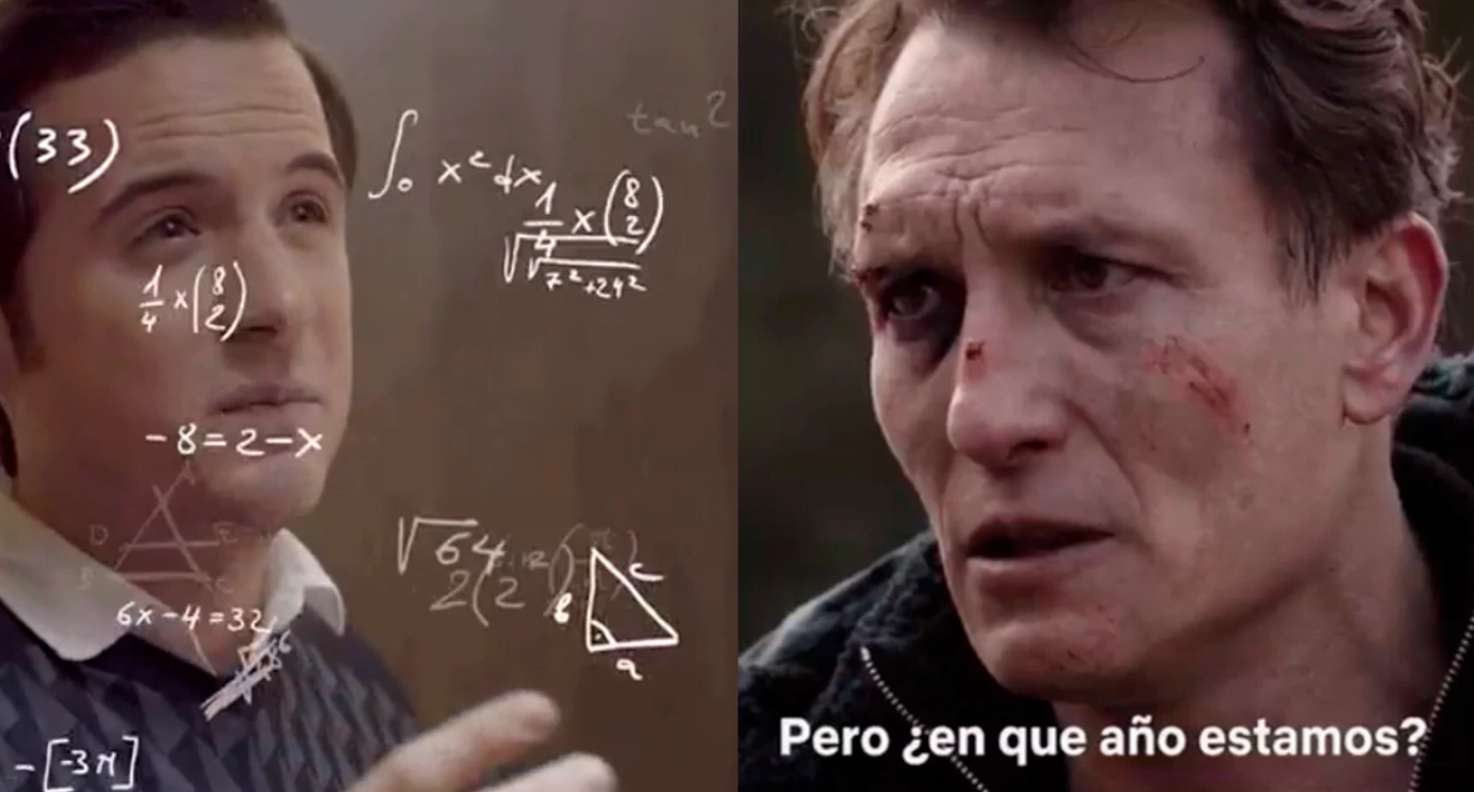

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math
from pmdarima import auto_arima

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/serie-tiempo-parques-nacionales-mensual.csv'
dataoriginal = pd.read_csv(url)

In [ ]:
data=dataoriginal.copy()

In [ ]:
data.head()

,indice_tiempo,no_residentes,residentes,total,buenos_aires_no_residentes,buenos_aires_residentes,buenos_aires_total,cordoba_no_residentes,cordoba_residentes,cordoba_total,...,cuyo_total,litoral_no_residentes,litoral_residentes,litoral_total,norte_no_residentes,norte_residentes,norte_total,patagonia_no_residentes,patagonia_residentes,patagonia_total
0,2008-01-01,198407,352303,550710,0,885,885,145,717,862,...,5144,55335,111408,166743,774,4241,5016,141973,230087,372060
1,2008-02-01,151809,283145,434953,0,624,624,148,475,623,...,4942,53596,85853,139449,1294,5099,6393,96632,186291,282923
2,2008-03-01,148533,173134,321667,0,0,0,147,741,888,...,5900,55130,59150,114280,1696,9204,10900,91382,98317,189699
3,2008-04-01,68558,61539,130097,0,462,462,166,539,705,...,1808,30827,23821,54648,728,3867,4595,36759,31121,67879
4,2008-05-01,43751,48787,92538,0,1091,1091,129,608,737,...,2402,29818,28538,58356,663,5083,5746,13038,11169,24206


In [ ]:
data.fecha = pd.to_datetime(data.indice_tiempo, dayfirst = True)
data.set_index("indice_tiempo", inplace=True)
data.drop(["2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01","2021-01-01","2021-02-01","2021-03-01","2021-04-01","2021-05-01","2021-06-01","2021-07-01","2021-08-01","2021-09-01","2021-10-01","2021-11-01","2021-12-01"],axis=0, inplace=True)

<ipython-input-6-6849ce24cc87>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.fecha = pd.to_datetime(data.indice_tiempo, dayfirst = True)


In [ ]:
dataoriginal.drop([146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167],axis=0, inplace=True)
# dataoriginal.drop(range(146, 168), axis=0, inplace=True) ---> Otra forma de hacerlo

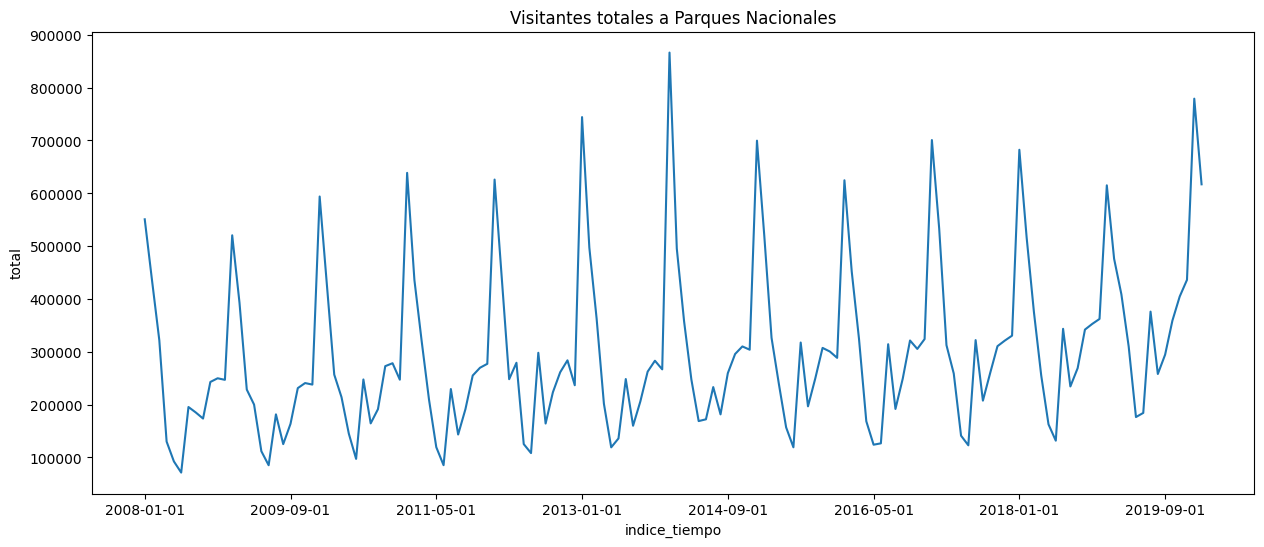

In [ ]:
data["total"].plot(figsize=(15, 6))
plt.xlabel("indice_tiempo")
plt.ylabel("total")
plt.title("Visitantes totales a Parques Nacionales")
plt.show()

Dividimos los datos en conjuntos de entrenamiento y prueba - Teniendo en cuenta las caracteristicas particulares de una serie de tiempo

In [ ]:
#Divido la serie de tiempo en entrenamiento y testeo ( manteniendo la cronologia )
train_len = len(data)-12 # Base de entrenamiento, total general menos los ultimos 12 periodos
train = data[0:train_len] # Primeros 134 meses para entrenamiento
test = data[train_len:] # Ultimos 12 meses para testeo

1 - Average Method (Los pronósticos de todos los valores futuros son iguales al promedio de los datos históricos)

In [ ]:
numerado = train['total'].sum()
denominador = len(train)
resultado = numerado / denominador

In [ ]:
# predicion
test['prediccion_Average_M'] = resultado

<ipython-input-11-820325048c66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediccion_Average_M'] = resultado


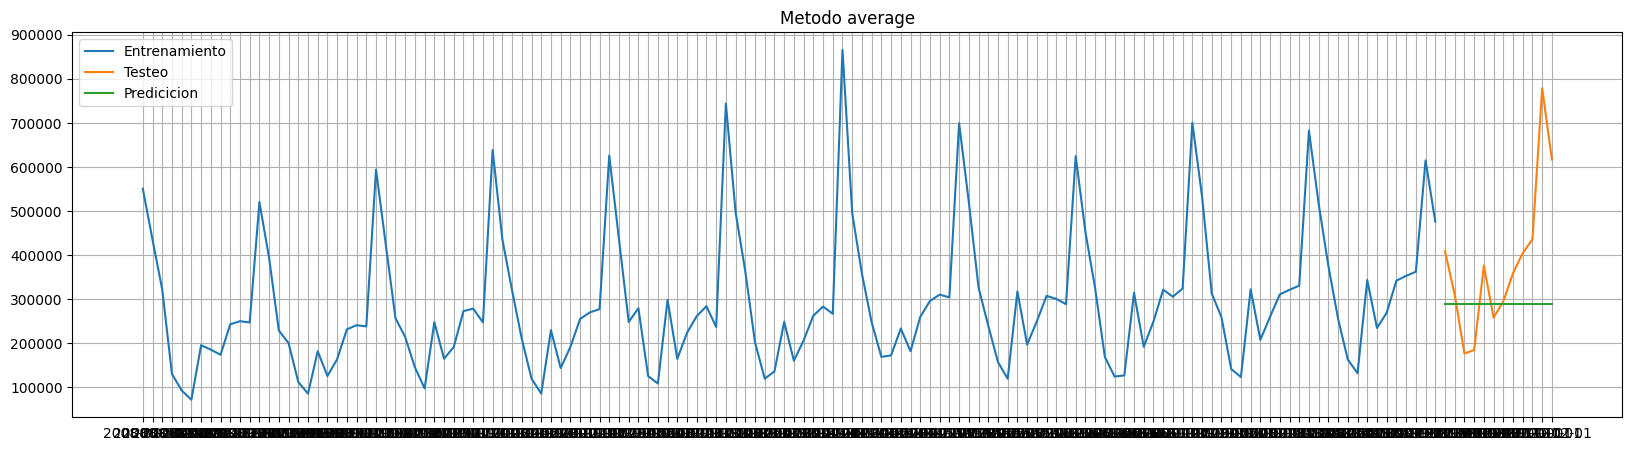

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total'], label='Entrenamiento')
plt.plot(test['total'], label='Testeo')
plt.plot(test['prediccion_Average_M'], label='Predicicion')
plt.legend(loc='best')
plt.title('Metodo average')
plt.show()

In [ ]:
# metricas del pronostico a analizar posteriormente
MAE_AV_METHOD = mean_absolute_error(test['total'], test['prediccion_Average_M'])
RMSE_AV_METHOD = math.sqrt(MAE_AV_METHOD)
MAPE_AV_METHOD = mean_absolute_percentage_error(test['total'], test['prediccion_Average_M'])

2 Naïve Method (Configuramos todos los pronósticos para que sean el valor del último observación)

In [ ]:
test['prediccion_Naive_M'] = train['total'][train_len-1]

<ipython-input-14-65e0595ac0e5>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test['prediccion_Naive_M'] = train['total'][train_len-1]
<ipython-input-14-65e0595ac0e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediccion_Naive_M'] = train['total'][train_len-1]


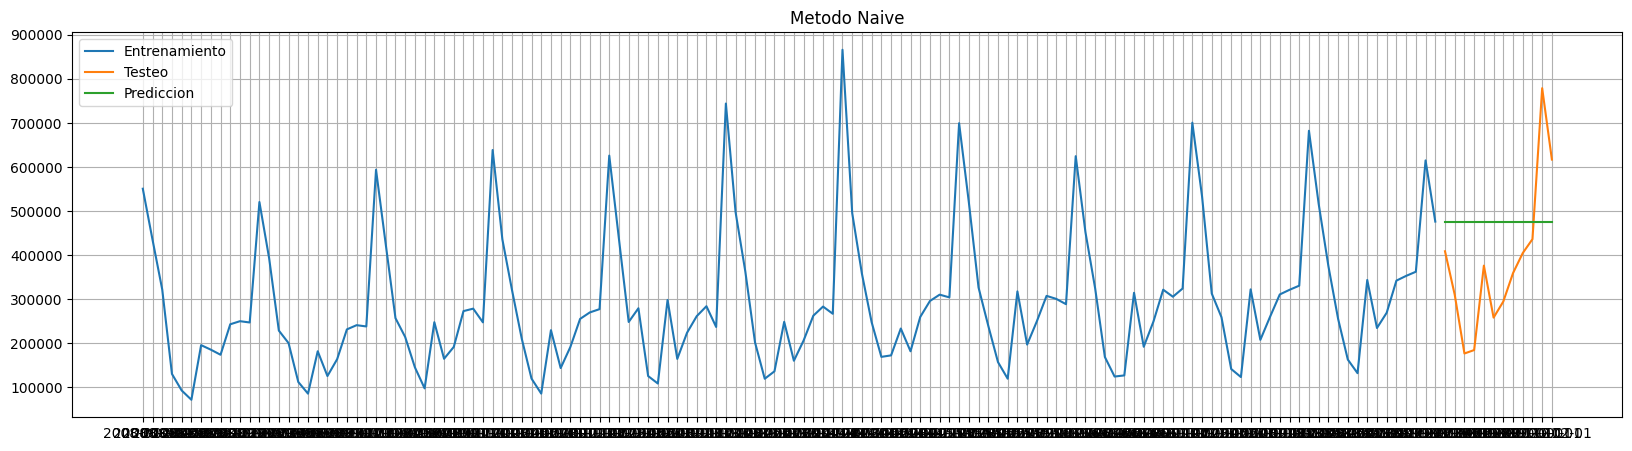

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total'], label='Entrenamiento')
plt.plot(test['total'], label='Testeo')
plt.plot(test['prediccion_Naive_M'], label='Prediccion')
plt.legend(loc='best')
plt.title('Metodo Naive')
plt.show()

In [ ]:
# metricas del pronostico a analizar posteriormente
MAE_NAIVE_METHOD = mean_absolute_error(test['total'], test['prediccion_Naive_M'])
RMSE_NAIVE_METHOD = math.sqrt(MAE_NAIVE_METHOD)
MAPE_NAIVE_METHOD = mean_absolute_percentage_error(test['total'], test['prediccion_Naive_M'])

3- Seasonal Naïve Method (establecemos cada pronóstico para ser igual al último valor observado de la misma estación del año)

In [ ]:
# Metodo Naive Estacional
seasonal_period = 12  # Mensual
naive_forecast = train['total'].iloc[-seasonal_period:].values  # Últimos 12 valores como pronóstico

# Repetir el pronóstico para el período de prueba
forecast = np.tile(naive_forecast, int(np.ceil(len(test) / seasonal_period)))[:len(test)]

In [ ]:
# Sumo el pronostico al dataframe
test['prediccion_Naive_Estacional'] = forecast

<ipython-input-18-ebfc078cf5a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediccion_Naive_Estacional'] = forecast


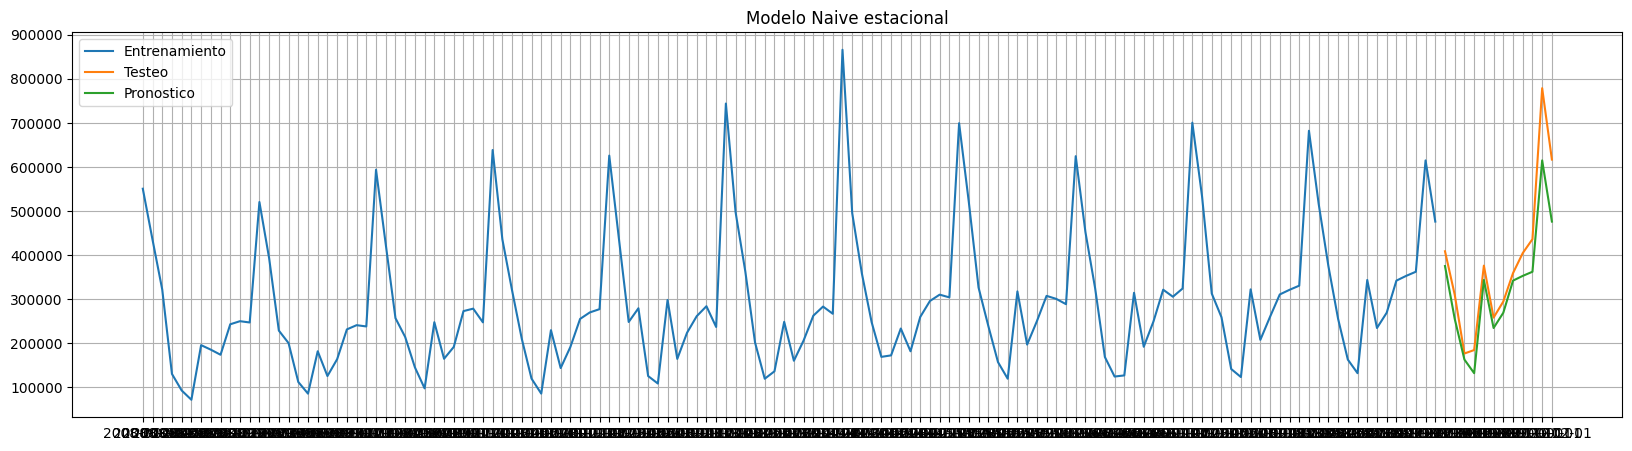

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total'], label='Entrenamiento')
plt.plot(test['total'], label='Testeo')
plt.plot(test['prediccion_Naive_Estacional'], label='Pronostico')
plt.legend(loc='best')
plt.title('Modelo Naive estacional')
plt.show()

In [ ]:
# metricas del pronostico a analizar posteriormente
MAE_NAIVE_ESTACIONAL_METHOD = mean_absolute_error(test['total'], test['prediccion_Naive_Estacional'])
RMSE_NAIVE_ESTACIONAL_METHOD = math.sqrt(MAE_NAIVE_ESTACIONAL_METHOD)
MAPE_NAIVE_ESTACIONAL_METHOD = mean_absolute_percentage_error(test['total'], test['prediccion_Naive_Estacional'])

4 - Metodo Drift ( calcula los pronósticos futuros extrapolando una línea recta desde la primera observación hasta la última)

In [ ]:
#Divido la serie de tiempo en training y test
train_len = 134
train = data[0:train_len] # Primeros 134 meses para entrenamiento
trainoriginal= dataoriginal[0:train_len]  # adaptacion para poder correr el metodo drift
test = data[train_len:] # Ultimos 12 meses para testeo
testoriginal = dataoriginal[train_len:] # adaptacion para poder correr el metodo drift

In [ ]:
y_t = trainoriginal.loc[len(trainoriginal)-1]['total']
m = (y_t - trainoriginal.loc[0]['total']) / len(trainoriginal)
y_hat_drift = testoriginal.copy().drop('total', axis=1)
h = np.linspace(0,len(y_hat_drift)-1, len(y_hat_drift))
y_hat_drift['drift_forecast'] = y_t + m * h

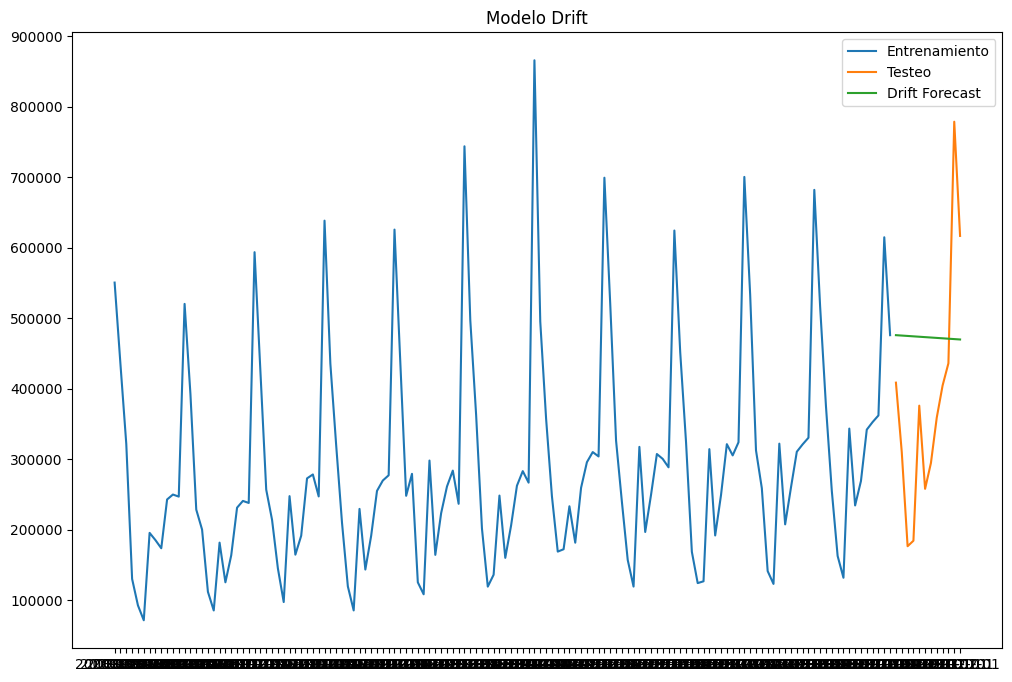

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(trainoriginal['indice_tiempo'], trainoriginal['total'], label='Entrenamiento')
plt.plot(testoriginal['indice_tiempo'], testoriginal['total'], label='Testeo')
plt.plot(y_hat_drift['indice_tiempo'], y_hat_drift['drift_forecast'],
        label='Drift Forecast')
plt.legend(loc='best')
plt.title('Modelo Drift')
plt.show()

In [ ]:
# metricas del pronostico a analizar posteriormente
MAE_DRIFT_METHOD = mean_absolute_error(test['total'], y_hat_drift['drift_forecast'])
RMSE_DRIFT_METHOD = math.sqrt(MAE_DRIFT_METHOD)
MAPE_DRIFT_METHOD = mean_absolute_percentage_error(test['total'], y_hat_drift['drift_forecast'])

Evaluación de la Performance del Pronóstico

- MAE (Error absoluto medio) calcula el promedio de las diferencias absolutas entre los valores predichos y los valores reales. Es una medida directa de cuán lejos, en promedio, están las predicciones del modelo de los resultados reales. Un MAE menor indica un modelo con mejores predicciones.
- RMSE (Error cuadrático medio) es una métrica que cuantifica la diferencia entre los valores predichos y los valores reales en un modelo de predicción. Se calcula como la raíz cuadrada de la media de los cuadrados de los errores. El RMSE es útil porque penaliza los errores grandes más severamente que el MAE, proporcionando una medida más sensible para las variaciones en los errores. Un RMSE más bajo indica un modelo que se ajusta mejor a los datos observados.
-MAPE (Error porcentual absoluto medio) es una métrica que calcula el error porcentual promedio entre los valores predichos y los valores reales. Es especialmente útil para evaluar la precisión relativa de un modelo en términos porcentuales, siendo menos sensible a valores atípicos que el RMSE.

In [ ]:
# Average Method

resultados_AV_METHOD = pd.DataFrame({'Metodo':['Average Method'],'MAE':[MAE_AV_METHOD] ,'RMSE': [RMSE_AV_METHOD], 'MAPE': [MAPE_AV_METHOD * 100]})
resultados_AV_METHOD = resultados_AV_METHOD[['Metodo', 'MAE','RMSE', 'MAPE']]

# Naïve Method

resultados_NAIVE_METHOD = pd.DataFrame({'Metodo':['Naïve Method'],'MAE':[MAE_NAIVE_METHOD] ,'RMSE': [RMSE_NAIVE_METHOD], 'MAPE': [MAPE_NAIVE_METHOD * 100]})
resultados_NAIVE_METHOD = resultados_NAIVE_METHOD[['Metodo', 'MAE','RMSE', 'MAPE']]

# Naive estacional

resultados_NAIVE_ESTACIONAL_METHOD = pd.DataFrame({'Metodo':['Seasonal Naïve Method'],'MAE':[MAE_NAIVE_ESTACIONAL_METHOD] ,'RMSE': [RMSE_NAIVE_ESTACIONAL_METHOD], 'MAPE': [MAPE_NAIVE_ESTACIONAL_METHOD * 100]})
resultados_NAIVE_ESTACIONAL_METHOD = resultados_NAIVE_ESTACIONAL_METHOD[['Metodo', 'MAE','RMSE', 'MAPE']]

# Metodo Drift

resultados_DRIFT_METHOD = pd.DataFrame({'Metodo':['Drift Method'],'MAE':[MAE_DRIFT_METHOD] ,'RMSE': [RMSE_DRIFT_METHOD], 'MAPE': [MAPE_DRIFT_METHOD * 100]})

In [ ]:
resultados = pd.concat([resultados_AV_METHOD, resultados_NAIVE_METHOD, resultados_NAIVE_ESTACIONAL_METHOD, resultados_DRIFT_METHOD], ignore_index=True)

print(resultados)

                  Metodo            MAE        RMSE       MAPE
0         Average Method  135798.741294  368.508808  32.599905
1           Naïve Method  166393.666667  407.913798  57.663877
2  Seasonal Naïve Method   56999.083333  238.744808  13.921661
3           Drift Method  165279.696517  406.546057  57.151153


Graficos de las metricas

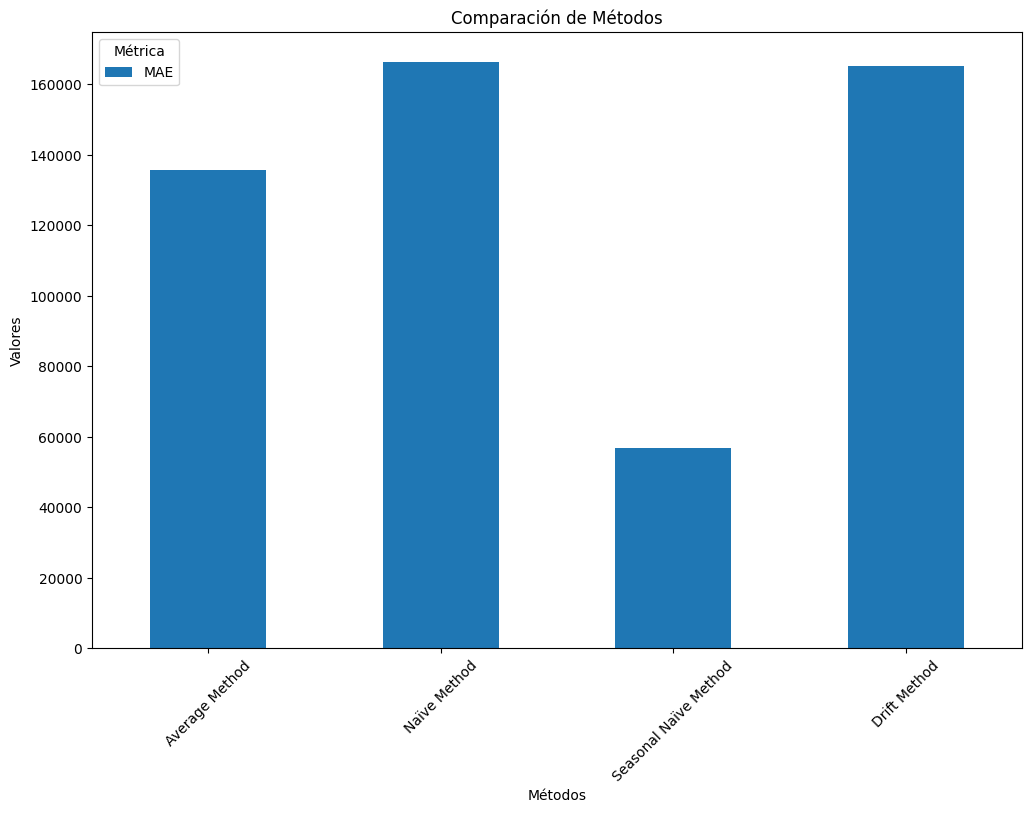

In [ ]:
columnas_a_mostrar = ['Metodo', 'MAE']
resultados_mostrar = resultados[columnas_a_mostrar]

resultados_mostrar.plot(kind='bar', x='Metodo', figsize=(12, 8))

plt.xlabel('Métodos')
plt.ylabel('Valores')
plt.title('Comparación de Métodos')
plt.xticks(rotation=45)
plt.legend(title='Métrica')
plt.show()

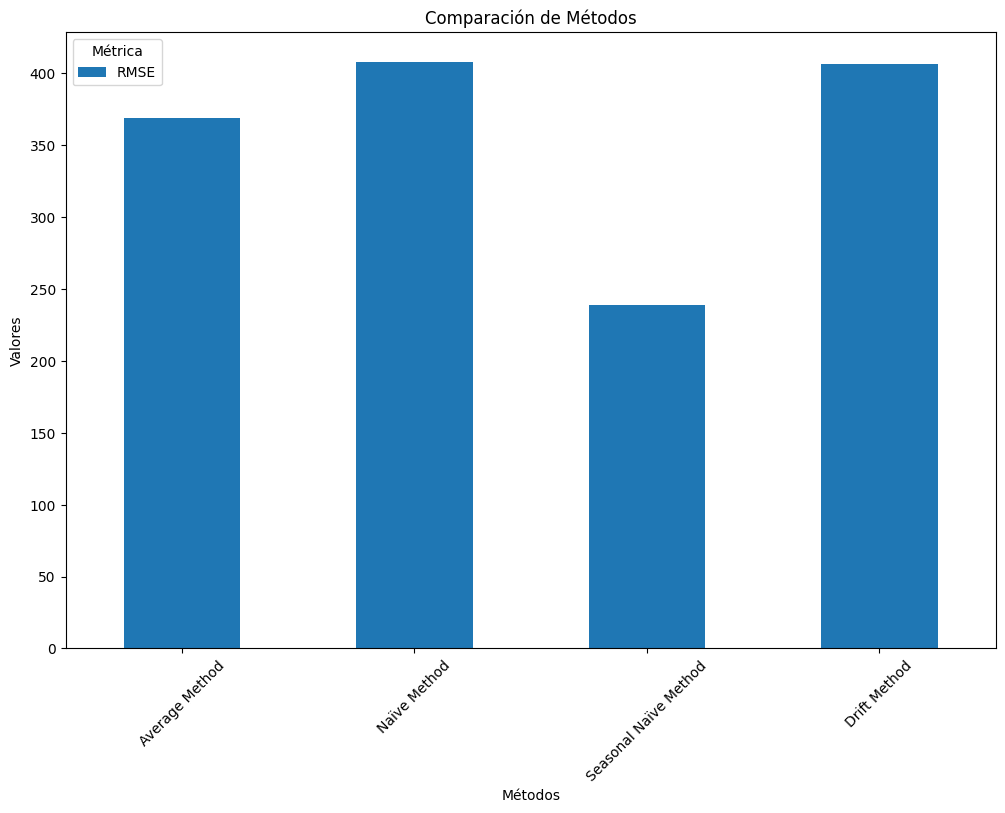

In [ ]:
columnas_a_mostrar = ['Metodo', 'RMSE']
resultados_mostrar = resultados[columnas_a_mostrar]

resultados_mostrar.plot(kind='bar', x='Metodo', figsize=(12, 8))

plt.xlabel('Métodos')
plt.ylabel('Valores')
plt.title('Comparación de Métodos')
plt.xticks(rotation=45)
plt.legend(title='Métrica')
plt.show()

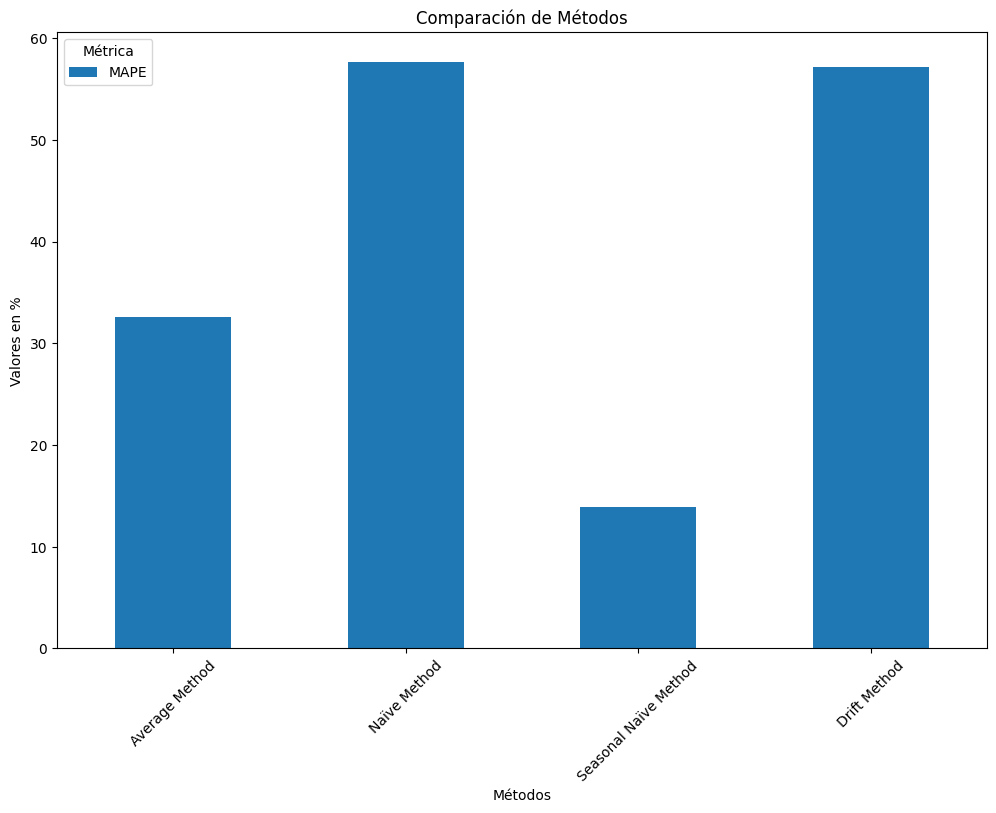

In [ ]:
columnas_a_mostrar = ['Metodo', 'MAPE']
resultados_mostrar = resultados[columnas_a_mostrar]

resultados_mostrar.plot(kind='bar', x='Metodo', figsize=(12, 8))

plt.xlabel('Métodos')
plt.ylabel('Valores en %')
plt.title('Comparación de Métodos')
plt.xticks(rotation=45)
plt.legend(title='Métrica')
plt.show()

Otros Métodos Simples de Forecasting

- Holt winters exponential smoothing = El método de suavizado exponencial de Holt-Winters permite pronosticar valores futuros basándose en la observación de datos pasados. Se adapta a datos con tendencias y estacionalidades utilizando tres componentes: nivel (media), tendencia (cambio en el nivel) y estacionalidad (variación repetitiva a lo largo del tiempo). Pondera las observaciones recientes con más peso que las antiguas.

In [ ]:
len(data)-12

134

In [ ]:
#Divido la serie de tiempo en entrenamiento y testeo
train_len = 134
train = data[0:train_len] # Primeros 134 meses para entrenamiento
test = data[train_len:] # Ultimos 12 meses para testeo

In [ ]:
# Entreno el modelo
fitted_model = ExponentialSmoothing(train["total"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
prediccion=[]

for dia in range(0,12):
  prediccion.append(test_predictions[dia])

<ipython-input-32-9d929e8a8c8f>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediccion.append(test_predictions[dia])


In [ ]:
print(prediccion)

[353275.8486032951, 245907.47417041517, 151884.84829678896, 131333.00846471018, 323134.7064262293, 209456.69124497045, 254364.88500786942, 314847.0076771389, 318601.02824729553, 321214.0100139653, 646375.589928185, 503912.9222233843]


In [ ]:
test['prediccion'] = np.array(prediccion)

<ipython-input-34-73cd4b0851ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediccion'] = np.array(prediccion)


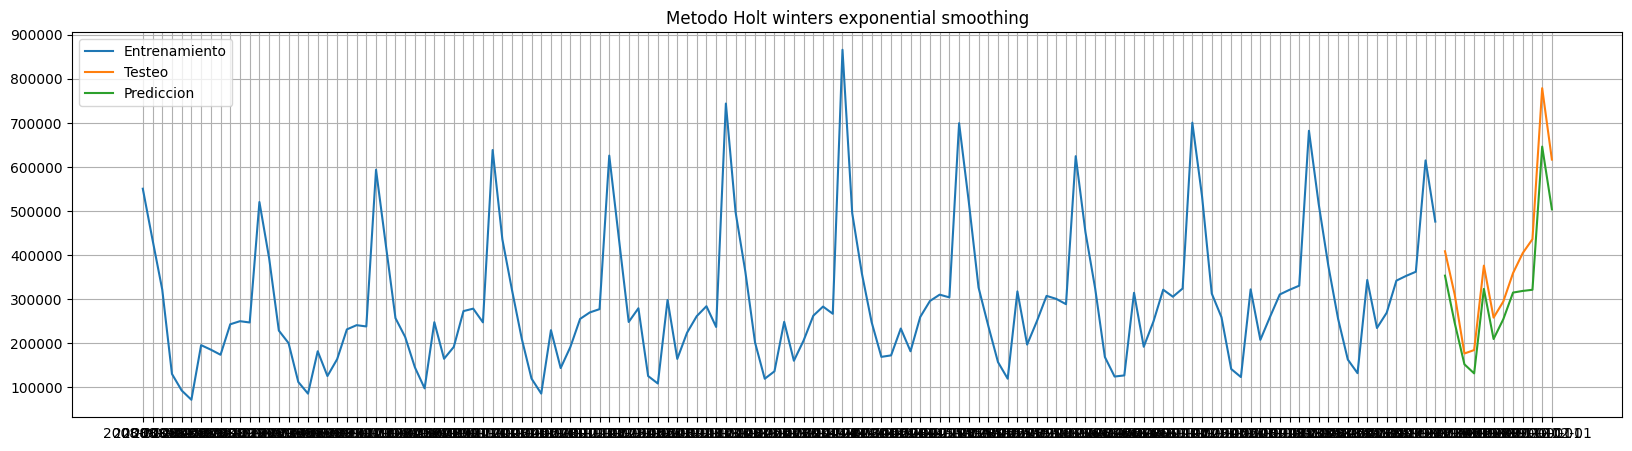

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total'], label='Entrenamiento')
plt.plot(test['total'], label='Testeo')
plt.plot(test['prediccion'], label='Prediccion')
plt.legend(loc='best')
plt.title('Metodo Holt winters exponential smoothing')
plt.show()

In [ ]:
data= data.drop(columns = ["patagonia_total","residentes","no_residentes","buenos_aires_no_residentes","buenos_aires_residentes","buenos_aires_total"	,"cordoba_no_residentes"	,"cordoba_residentes"	,"cordoba_total"	,"cuyo_no_residentes"	,"cuyo_residentes"	,"cuyo_total"	,"litoral_no_residentes"	,"litoral_residentes"	,"litoral_total"	,"norte_no_residentes"	,"norte_residentes"	,"norte_total"	,"patagonia_no_residentes"	,"patagonia_residentes"])

In [ ]:
data.head(5)

,total
indice_tiempo,
2008-01-01,550710
2008-02-01,434953
2008-03-01,321667
2008-04-01,130097
2008-05-01,92538


Validación Cruzada de Series de Tiempo
- K-fold Cross-Validation en series de tiempo

In [ ]:
train_ind = int(len(data)*0.8)
train = data[:train_ind]
test = data[train_ind:]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
model = ExponentialSmoothing(train,trend="mul",seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])
MSE=round(mean_squared_error(test, pred),2)
MSE

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2846417512.06

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(gap=2, n_splits=5)

train_sets = []
test_sets = []

for i, (train_index, test_index) in enumerate(tscv.split(data)):
    train_data = data.iloc[train_index, 0]
    test_data = data.iloc[test_index, 0]

    train_sets.append(train_data)
    test_sets.append(test_data)



train1, test1 = train_sets[0], test_sets[0]
train2, test2 = train_sets[1], test_sets[1]
train3, test3 = train_sets[2], test_sets[2]
train4, test4 = train_sets[3], test_sets[3]
train5, test5 = train_sets[4], test_sets[4]

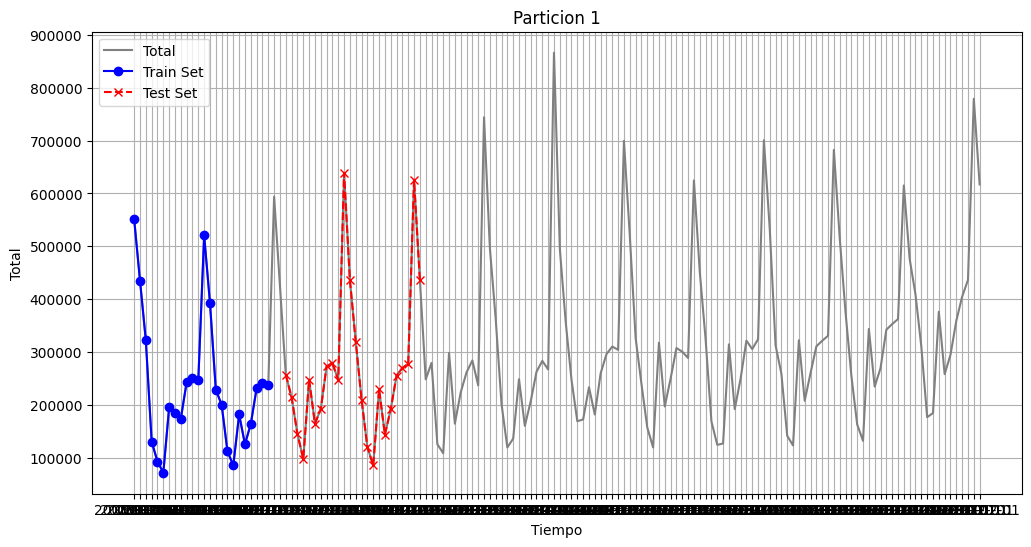

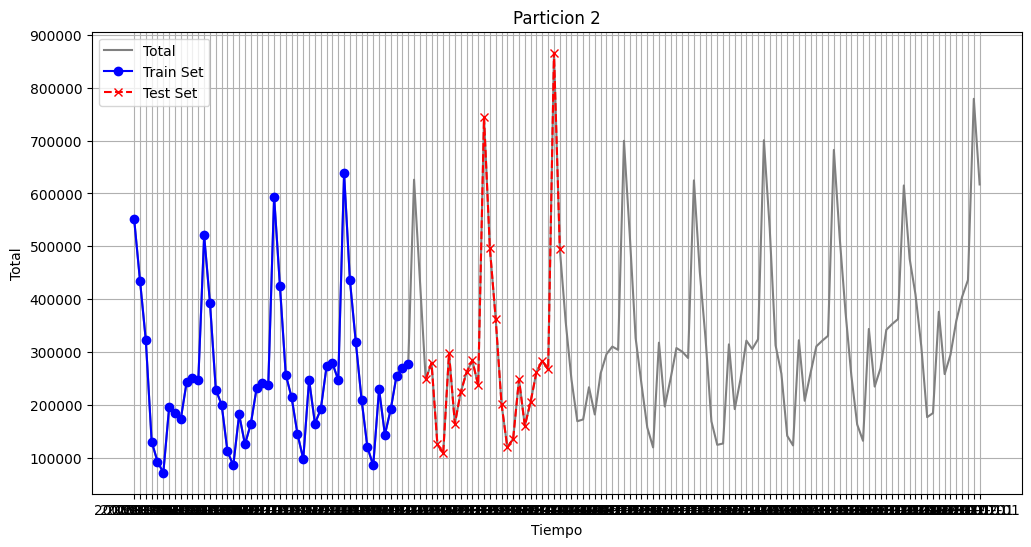

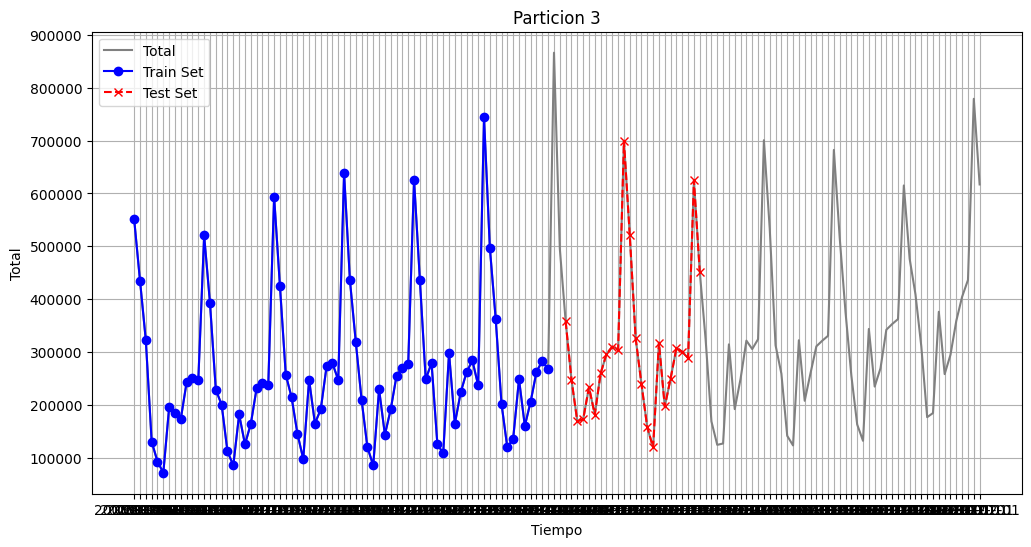

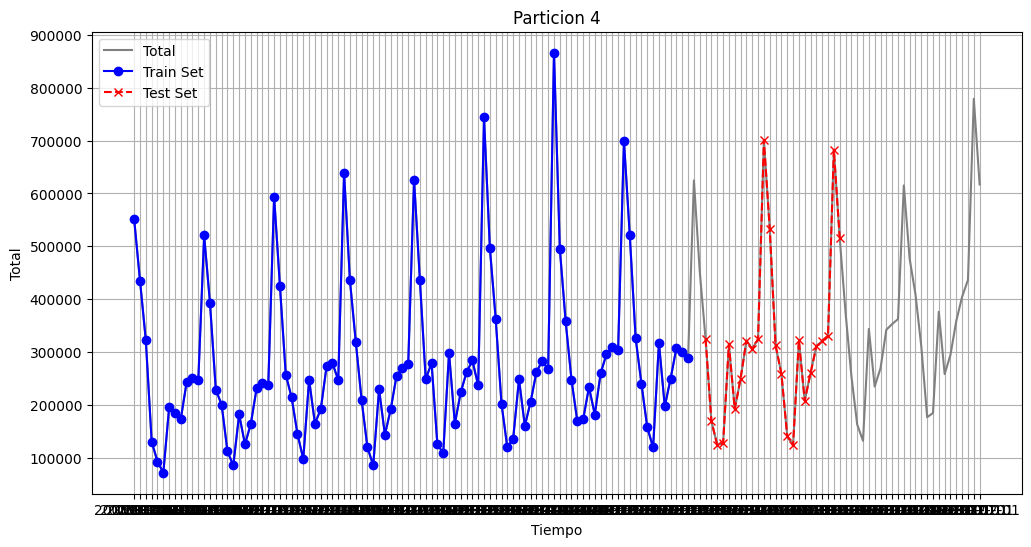

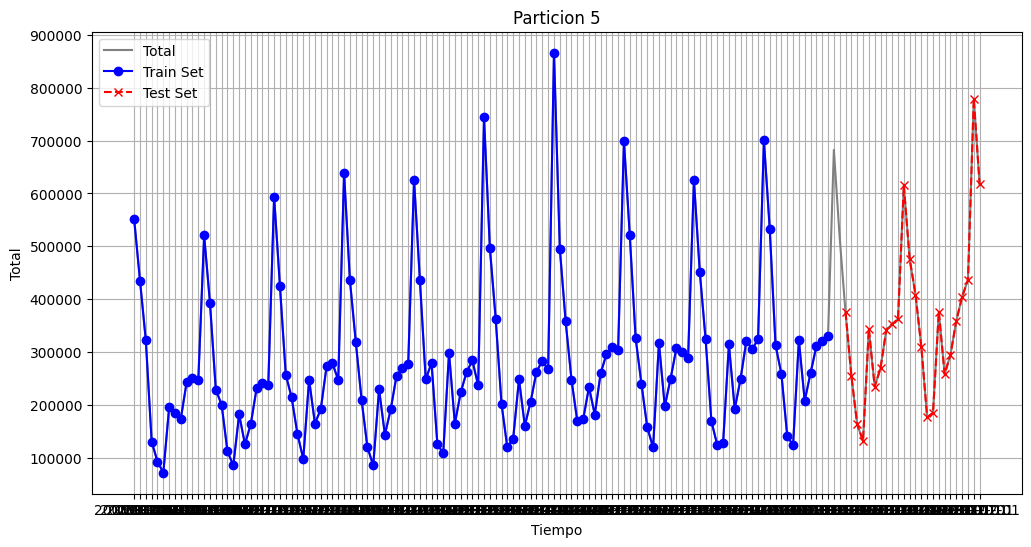

In [ ]:
# Grafico orientativo

tscv = TimeSeriesSplit(gap=2, n_splits=5)

for i, (train_index, test_index) in enumerate(tscv.split(data)):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['total'], label='Total', color='grey')

    plt.plot(data.index[train_index], data['total'].iloc[train_index], 'o-', label='Train Set', color='blue')
    plt.plot(data.index[test_index], data['total'].iloc[test_index], 'x--', label='Test Set', color='red')

    plt.title(f'Particion {i + 1}')
    plt.xlabel('Tiempo')
    plt.ylabel('Total')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
model1 = ExponentialSmoothing(train1,trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred1 = model1.predict(start=test1.index[0], end=test1.index[-1])
MSE1=round(mean_squared_error(test1, pred1),2)
model2 = ExponentialSmoothing(train2,trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred2 = model2.predict(start=test2.index[0], end=test2.index[-1])
MSE2=round(mean_squared_error(test2, pred2),2)
model3 = ExponentialSmoothing(train3,trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred3 = model3.predict(start=test3.index[0], end=test3.index[-1])
MSE3=round(mean_squared_error(test3, pred3),2)
model4 = ExponentialSmoothing(train4,trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred4 = model4.predict(start=test4.index[0], end=test4.index[-1])
MSE4=round(mean_squared_error(test4, pred4),2)
model5 = ExponentialSmoothing(train5,trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred5 = model5.predict(start=test5.index[0], end=test5.index[-1])
MSE5=round(mean_squared_error(test5, pred5),2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmode

In [ ]:
print ("Error cuadratico medio:", MSE)
print ("Error cuadratico medio 1:", MSE1)
print ("Error cuadratico medio 2:", MSE2)
print ("Error cuadratico medio 3:", MSE3)
print ("Error cuadratico medio 4:", MSE4)
print ("Error cuadratico medio 5:", MSE5)

Error cuadratico medio: 2846417512.06
Error cuadratico medio 1: 5314409747.33
Error cuadratico medio 2: 3248457996.43
Error cuadratico medio 3: 1073049025.45
Error cuadratico medio 4: 2833222686.11
Error cuadratico medio 5: 3160092733.45


In [ ]:
Overall_MSE=round((MSE1+MSE2+MSE3+MSE4+MSE5)/5,2)
print ("Error cuadratico medio general:", Overall_MSE)

Error cuadratico medio general: 3125846437.75


FIN DEL CODIGO - GRACIAS